In [120]:
import pandas as pd
df=pd.read_csv('base_marketing.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,Ocupacao,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
0,Engenheiro,60.00,5681.00,368.00,Sudeste,Feminino,Basico,Preco Alto
1,Engenheiro,21.00,6172.00,261.08,Norte,Masculino,Basico,Cobertura Ruim
2,Engenheiro,21.00,9686.09,262.89,Norte,Feminino,Basico,Atendimento Ruim
3,Engenheiro,34.00,3782.00,394.00,Sudeste,Masculino,Basico,Atendimento Ruim
4,Engenheiro,52.31,9511.08,339.00,Nordeste,Masculino,Basico,Cobertura Ruim
...,...,...,...,...,...,...,...,...
4923,Desempregado,38.00,7601.04,253.21,Norte,Feminino,Intermediario,Cobertura Ruim
4924,Engenheiro,38.00,7601.04,253.21,Norte,Feminino,Intermediario,Cobertura Ruim
4925,Comerciante,38.00,7601.04,253.21,Norte,Feminino,Intermediario,Cobertura Ruim
4926,Comerciante,38.00,7601.04,253.21,Norte,Feminino,Intermediario,Cobertura Ruim


# Tranformando em Dummies

In [107]:
df_dummies = pd.get_dummies(df)
df_dummies

,Idade,Renda_Mensal,Gasto_Internet,Ocupacao_Advogado,Ocupacao_Autônomo,Ocupacao_Comerciante,Ocupacao_Desempregado,Ocupacao_Engenheiro,Ocupacao_Estudante,Ocupacao_Médico,...,Regiao_Sul,Genero_Feminino,Genero_Masculino,Genero_Outro,Plano_Atual_Basico,Plano_Atual_Intermediario,Plano_Atual_Premium,Motivo_Troca_Atendimento Ruim,Motivo_Troca_Cobertura Ruim,Motivo_Troca_Preco Alto
0,60.00,5681.00,368.00,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1,21.00,6172.00,261.08,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,21.00,9686.09,262.89,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,34.00,3782.00,394.00,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
4,52.31,9511.08,339.00,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,38.00,7601.04,253.21,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4924,38.00,7601.04,253.21,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4925,38.00,7601.04,253.21,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4926,38.00,7601.04,253.21,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [108]:
df_normalizada = df_dummies.div(df_dummies.sum(axis=1), axis='rows')
df_normalizada

,Idade,Renda_Mensal,Gasto_Internet,Ocupacao_Advogado,Ocupacao_Autônomo,Ocupacao_Comerciante,Ocupacao_Desempregado,Ocupacao_Engenheiro,Ocupacao_Estudante,Ocupacao_Médico,...,Regiao_Sul,Genero_Feminino,Genero_Masculino,Genero_Outro,Plano_Atual_Basico,Plano_Atual_Intermediario,Plano_Atual_Premium,Motivo_Troca_Atendimento Ruim,Motivo_Troca_Cobertura Ruim,Motivo_Troca_Preco Alto
0,0.009814,0.929179,0.060190,0.0,0.0,0.000000,0.000000,0.000164,0.000000,0.0,...,0.0,0.000164,0.000000,0.0,0.000164,0.000000,0.0,0.000000,0.000000,0.000164
1,0.003251,0.955554,0.040421,0.0,0.0,0.000000,0.000000,0.000155,0.000000,0.0,...,0.0,0.000000,0.000155,0.0,0.000155,0.000000,0.0,0.000000,0.000155,0.000000
2,0.002105,0.971039,0.026355,0.0,0.0,0.000000,0.000000,0.000100,0.000000,0.0,...,0.0,0.000100,0.000000,0.0,0.000100,0.000000,0.0,0.000100,0.000000,0.000000
3,0.008066,0.897272,0.093476,0.0,0.0,0.000000,0.000000,0.000237,0.000000,0.0,...,0.0,0.000000,0.000237,0.0,0.000237,0.000000,0.0,0.000237,0.000000,0.000000
4,0.005280,0.959999,0.034217,0.0,0.0,0.000000,0.000000,0.000101,0.000000,0.0,...,0.0,0.000000,0.000101,0.0,0.000101,0.000000,0.0,0.000000,0.000101,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,0.004812,0.962492,0.032063,0.0,0.0,0.000000,0.000127,0.000000,0.000000,0.0,...,0.0,0.000127,0.000000,0.0,0.000000,0.000127,0.0,0.000000,0.000127,0.000000
4924,0.004812,0.962492,0.032063,0.0,0.0,0.000000,0.000000,0.000127,0.000000,0.0,...,0.0,0.000127,0.000000,0.0,0.000000,0.000127,0.0,0.000000,0.000127,0.000000
4925,0.004812,0.962492,0.032063,0.0,0.0,0.000127,0.000000,0.000000,0.000000,0.0,...,0.0,0.000127,0.000000,0.0,0.000000,0.000127,0.0,0.000000,0.000127,0.000000
4926,0.004812,0.962492,0.032063,0.0,0.0,0.000127,0.000000,0.000000,0.000000,0.0,...,0.0,0.000127,0.000000,0.0,0.000000,0.000127,0.0,0.000000,0.000127,0.000000


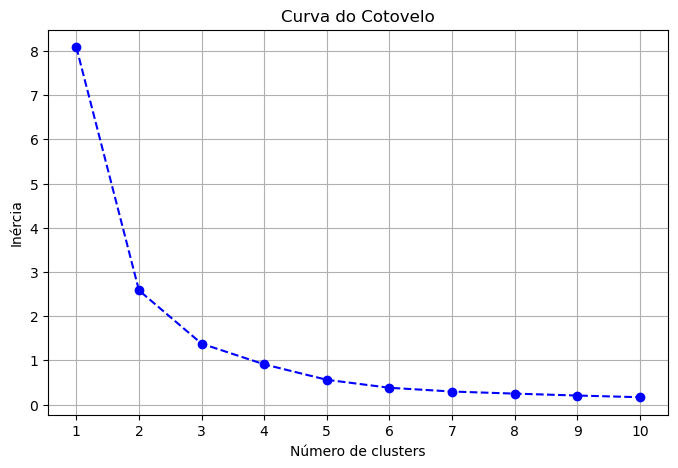

In [109]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Verificando se df_normalizada existe
try:
    X = df_normalizada.values  # Convertendo para numpy array
except NameError:
    raise ValueError("O DataFrame 'df_normalizada' não foi encontrado. Certifique-se de que ele existe.")

# Determinando a inércia para diferentes números de clusters
inertias = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotando a curva de cotovelo
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o', linestyle='--', color='b')
plt.title('Curva do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.xticks(cluster_range)
plt.grid()
plt.show()


### Utilizando o método Kneelocator para identificar o melhor cluster 

Melhor número de clusters (cotovelo): 3


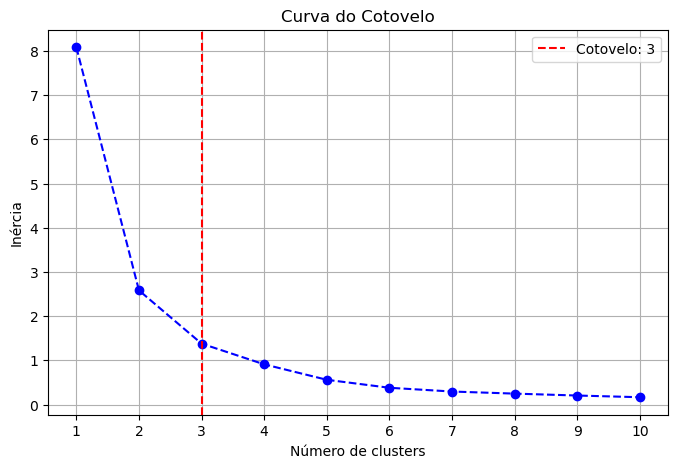

In [110]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

try:
    X = df_normalizada.values  # Convertendo para numpy array
except NameError:
    raise ValueError("O DataFrame 'df_normalizada' não foi encontrado. Certifique-se de que ele existe.")

# Determinando a inércia para diferentes números de clusters
inertias = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Usando KneeLocator para identificar o cotovelo
knee_locator = KneeLocator(cluster_range, inertias, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee
print(f"Melhor número de clusters (cotovelo): {optimal_k}")

# Plotando a curva do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o', linestyle='--', color='b')
plt.axvline(optimal_k, color='r', linestyle='--', label=f"Cotovelo: {optimal_k}")
plt.title('Curva do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.xticks(cluster_range)
plt.legend()
plt.grid()
plt.show()

Melhor número de clusters com base no método da silhueta: 2


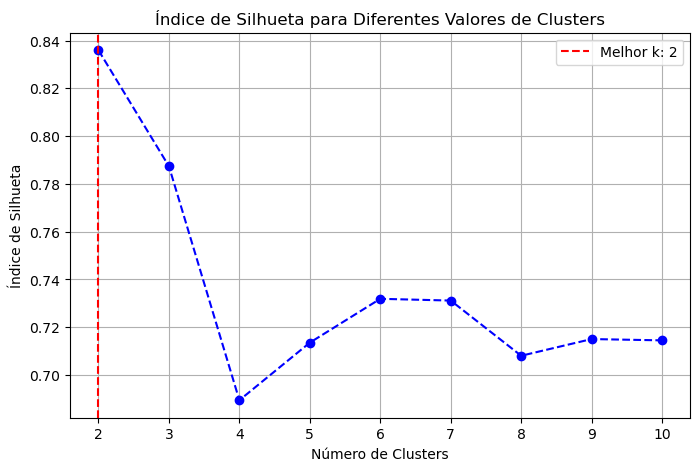

In [111]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Verificando se df_normalizada existe
try:
    X = df_normalizada.values  # Convertendo para numpy array
except NameError:
    raise ValueError("O DataFrame 'df_normalizada' não foi encontrado. Certifique-se de que ele existe.")

# Avaliando o índice de silhueta para diferentes números de clusters
silhouette_scores = []
cluster_range = range(2, 11)  # Começamos em 2 porque com 1 cluster não há variação

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Determinando o número ideal de clusters
optimal_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Exibindo resultados
print(f"Melhor número de clusters com base no método da silhueta: {optimal_k}")

# Plotando o índice de silhueta para cada valor de k
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.axvline(optimal_k, color='r', linestyle='--', label=f"Melhor k: {optimal_k}")
plt.title('Índice de Silhueta para Diferentes Valores de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.xticks(cluster_range)
plt.legend()
plt.grid()
plt.show()


In [112]:
df_normalizada.head()

,Idade,Renda_Mensal,Gasto_Internet,Ocupacao_Advogado,Ocupacao_Autônomo,Ocupacao_Comerciante,Ocupacao_Desempregado,Ocupacao_Engenheiro,Ocupacao_Estudante,Ocupacao_Médico,...,Regiao_Sul,Genero_Feminino,Genero_Masculino,Genero_Outro,Plano_Atual_Basico,Plano_Atual_Intermediario,Plano_Atual_Premium,Motivo_Troca_Atendimento Ruim,Motivo_Troca_Cobertura Ruim,Motivo_Troca_Preco Alto
0,0.009814,0.929179,0.060190,0.0,0.0,0.0,0.0,0.000164,0.0,0.0,...,0.0,0.000164,0.000000,0.0,0.000164,0.0,0.0,0.000000,0.000000,0.000164
1,0.003251,0.955554,0.040421,0.0,0.0,0.0,0.0,0.000155,0.0,0.0,...,0.0,0.000000,0.000155,0.0,0.000155,0.0,0.0,0.000000,0.000155,0.000000
2,0.002105,0.971039,0.026355,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,...,0.0,0.000100,0.000000,0.0,0.000100,0.0,0.0,0.000100,0.000000,0.000000
3,0.008066,0.897272,0.093476,0.0,0.0,0.0,0.0,0.000237,0.0,0.0,...,0.0,0.000000,0.000237,0.0,0.000237,0.0,0.0,0.000237,0.000000,0.000000
4,0.005280,0.959999,0.034217,0.0,0.0,0.0,0.0,0.000101,0.0,0.0,...,0.0,0.000000,0.000101,0.0,0.000101,0.0,0.0,0.000000,0.000101,0.000000


In [113]:
df.loc[:,'cluster'] = clusterizacao_por_km
df

,Ocupacao,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca,cluster
0,Engenheiro,60.00,5681.00,368.00,Sudeste,Feminino,Basico,Preco Alto,0
1,Engenheiro,21.00,6172.00,261.08,Norte,Masculino,Basico,Cobertura Ruim,0
2,Engenheiro,21.00,9686.09,262.89,Norte,Feminino,Basico,Atendimento Ruim,0
3,Engenheiro,34.00,3782.00,394.00,Sudeste,Masculino,Basico,Atendimento Ruim,1
4,Engenheiro,52.31,9511.08,339.00,Nordeste,Masculino,Basico,Cobertura Ruim,0
...,...,...,...,...,...,...,...,...,...
4923,Desempregado,38.00,7601.04,253.21,Norte,Feminino,Intermediario,Cobertura Ruim,0
4924,Engenheiro,38.00,7601.04,253.21,Norte,Feminino,Intermediario,Cobertura Ruim,0
4925,Comerciante,38.00,7601.04,253.21,Norte,Feminino,Intermediario,Cobertura Ruim,0
4926,Comerciante,38.00,7601.04,253.21,Norte,Feminino,Intermediario,Cobertura Ruim,0


In [114]:
df['cluster'].value_counts()


0    4554
1     374
Name: cluster, dtype: int64

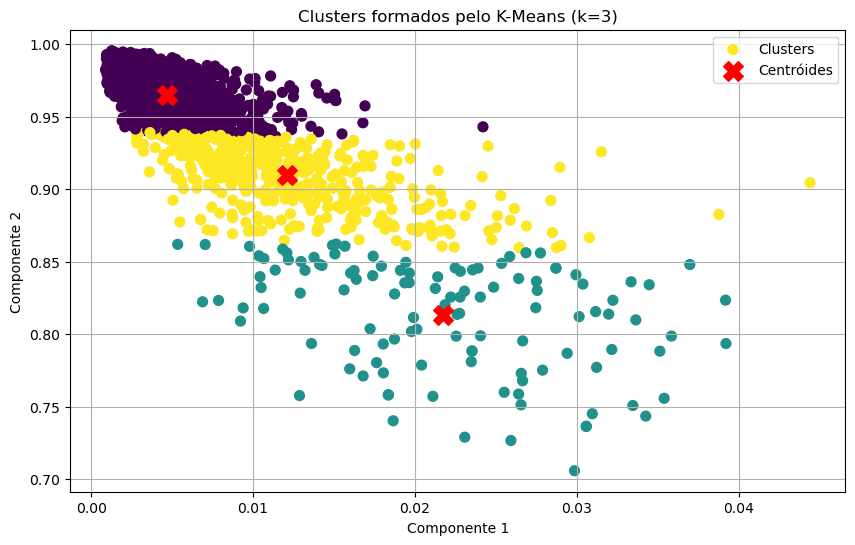


Exemplo do DataFrame clusterizado:
      Idade  Renda_Mensal  Gasto_Internet  Ocupacao_Advogado  \
0  0.009814      0.929179        0.060190                0.0   
1  0.003251      0.955554        0.040421                0.0   
2  0.002105      0.971039        0.026355                0.0   
3  0.008066      0.897272        0.093476                0.0   
4  0.005280      0.959999        0.034217                0.0   

   Ocupacao_Autônomo  Ocupacao_Comerciante  Ocupacao_Desempregado  \
0                0.0                   0.0                    0.0   
1                0.0                   0.0                    0.0   
2                0.0                   0.0                    0.0   
3                0.0                   0.0                    0.0   
4                0.0                   0.0                    0.0   

   Ocupacao_Engenheiro  Ocupacao_Estudante  Ocupacao_Médico  ...  \
0             0.000164                 0.0              0.0  ...   
1             0.000155      

In [117]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Verificando se df_normalizada existe
try:
    X = df_normalizada.values  # Convertendo para numpy array
except NameError:
    raise ValueError("O DataFrame 'df_normalizada' não foi encontrado. Certifique-se de que ele existe.")

# Definir o número de clusters desejado
n_clusters = 3  # Modifique para o número de clusters que desejar

# Aplicando o algoritmo de K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Adicionando os clusters ao DataFrame original
df_clusterizado = df_normalizada.copy()
df_clusterizado['Cluster'] = labels

# Visualização gráfica dos clusters
if X.shape[1] >= 2:  # Verifica se os dados têm pelo menos 2 dimensões para plotar
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label="Clusters")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centróides")
    plt.title(f'Clusters formados pelo K-Means (k={n_clusters})')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nOs dados não possuem pelo menos 2 dimensões para gerar o gráfico.")

# Exibindo um exemplo dos resultados
print("\nExemplo do DataFrame clusterizado:")
print(df_clusterizado.head())


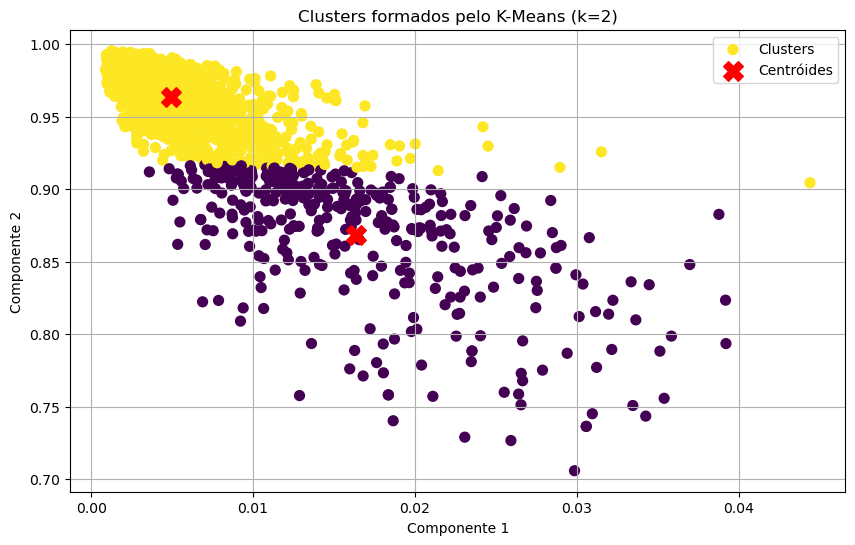

In [119]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Verificando se df_normalizada existe
try:
    X = df_normalizada.values  # Convertendo para numpy array
except NameError:
    raise ValueError("O DataFrame 'df_normalizada' não foi encontrado. Certifique-se de que ele existe.")

# Definir o número de clusters como 2
n_clusters = 2

# Aplicando o algoritmo de K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Visualização gráfica dos clusters
if X.shape[1] >= 2:  # Verifica se os dados têm pelo menos 2 dimensões
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label="Clusters")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centróides")
    plt.title('Clusters formados pelo K-Means (k=2)')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nOs dados não possuem pelo menos 2 dimensões para gerar o gráfico.")
